In [76]:
import pandas as pd
import os

In [77]:
df1 = pd.read_csv('./sales_data/Sales_April_2019.csv')

In [78]:
#Merging all the 12 months of sales data in a single CSV file
df2 = pd.DataFrame()
files = [file for file in os.listdir('./sales_data')]
for file in files:
    new_df = pd.read_csv(f'./sales_data/{file}')
    df2 = pd.concat([df2,new_df])

df2.to_csv("all_months_data.csv",index = False)

In [79]:
#All months merged dataset
df = pd.read_csv('all_months_data.csv')

In [80]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [81]:
#Removing the blank rows
df = df.dropna()

In [82]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [83]:
#Resetting the index after removing the blank rows
df.reset_index(drop = True, inplace = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [85]:
df.describe(include = 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [90]:
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')


In [91]:
df.describe(include = 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
count,185686,185686,185686.000000,185686.000000,185686,185686,185686
unique,178437,19,NaN,NaN,142395,140787,12
top,160873,USB-C Charging Cable,NaN,NaN,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016",12
freq,5,21859,NaN,NaN,8,9,24944
mean,NaN,NaN,1.124544,184.519255,NaN,NaN,NaN
std,NaN,NaN,0.443069,332.843838,NaN,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN,NaN
50%,NaN,NaN,1.000000,14.950000,NaN,NaN,NaN
75%,NaN,NaN,1.000000,150.000000,NaN,NaN,NaN


In [86]:
df = df.drop_duplicates()

In [87]:
#removing all data with NA
df = df.dropna(how='all')

In [88]:
#Extracting Month out of the date

# Alternative method = df['Order Date'].str.split('/').str.get(0)
df['Month'] = df['Order Date'].str[0:2]


In [89]:
#Solving the error occured below ( invalid literal for int() with base 10: 'Or')

df = df[df['Month'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [92]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [93]:
df['Month'] = df['Month'].astype('int32')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int32  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [95]:
#Adding a sales column
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [96]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### Q1: What was the best month for sales? How much is the Sales that month?

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186304
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int32  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  object 
 7   sales             185686 non-null  float64
 8   city              185686 non-null  object 
dtypes: float64(2), int32(1), object(6)
memory usage: 13.5+ MB


In [148]:
#Converting month number to month name abbreviations
#df['Month'] = df['Month'].apply(lambda x: calendar.month_name[x]) for full month name

import calendar

df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])


In [171]:

result= df.groupby(by = df.Month)['sales'].sum().sort_values(ascending = False)
res = pd.DataFrame({'month': result.index, 'sales': result.values})
res

,month,sales
0,Dec,4608295.70
1,Oct,3734777.86
2,Apr,3389217.98
3,Nov,3197875.05
4,May,3150616.23
5,Mar,2804973.35
6,Jul,2646461.32
7,Jun,2576280.15
8,Aug,2241083.37
9,Feb,2200078.08


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

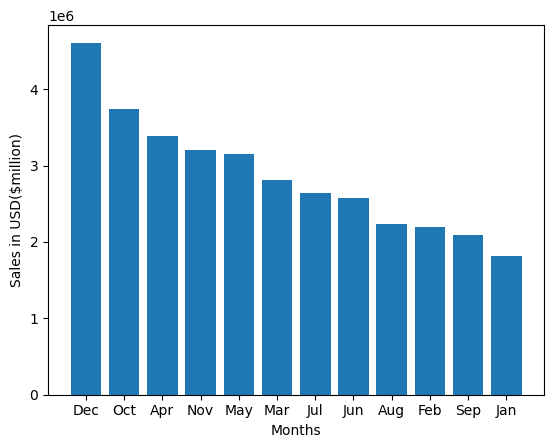

In [174]:
plt.bar(res['month'],res['sales'])
plt.xticks(result.index)
plt.xlabel('Months')
plt.ylabel('Sales in USD($million)')
plt.show()

In [100]:
px.bar(x = result.index,y = result,text = result).update_layout(width = 950, height =600, xaxis_title = 'Months Number',yaxis_title = 'Sales in USD($)')

##### December is the month with the highest sales ($ 4,608,295.7) 

### Q2:  What city had the highest number of sales?

In [133]:
#We extract the city from the purchase address and make a new column city
#alternative method: df['Purchase Address'].apply(lambda x: x.split(',')[1])

df['city'] = df['Purchase Address'].str.split(',').str.get(1)


In [134]:
#Extracting state from the purchase address as there is possiblity of cities with the same name but different state
df['state'] = df['Purchase Address'].apply(lambda x: x.split(',')[2][1:3])

In [135]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,CA
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,CA
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,CA


In [136]:
df['City'] = df['city'] + '(' + df['state'] +')'

In [137]:
df = df.drop(columns = ['city','state'])

In [138]:
df.rename(columns = {'City':'city','Sales':'sales'},inplace = True)

In [139]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA)
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA)


In [179]:
city_sales = df.groupby('city')['sales'].sum().reset_index(name = 'sales')
city_sales

,city,sales
0,Atlanta(GA),2794199.07
1,Austin(TX),1818044.33
2,Boston(MA),3658627.65
3,Dallas(TX),2765373.96
4,Los Angeles(CA),5448304.28
5,New York City(NY),4661867.14
6,Portland(ME),449321.38
7,Portland(OR),1870010.56
8,San Francisco(CA),8254743.55
9,Seattle(WA),2745046.02


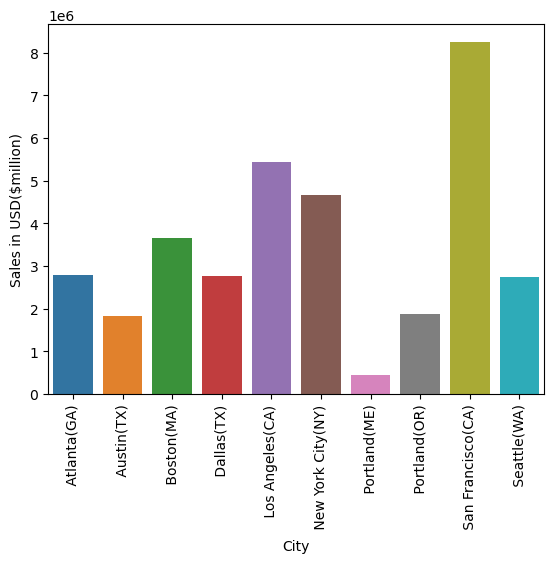

In [256]:
sns.barplot(x = city_sales['city'],y = city_sales['sales'])
plt.xticks(rotation = 90)
plt.xlabel('City')
plt.ylabel('Sales in USD($million)')
plt.show()

##### San Francisco has the highest sales amount ($ 8,254,743.55)

### Q3: What time should we display advertisements to maximize likelihood of customers' buying product?

In [197]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format = '%Y%m%d%H%M%S')

In [203]:
df['hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas(TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston(MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),9
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles(CA),20
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco(CA),16
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco(CA),7
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco(CA),17


In [207]:
hour_order = df.groupby('hour')['Product'].count().reset_index(name = 'no_of_orders')
hour_order

,hour,no_of_orders
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852
5,5,1320
6,6,2481
7,7,4002
8,8,6252
9,9,8740


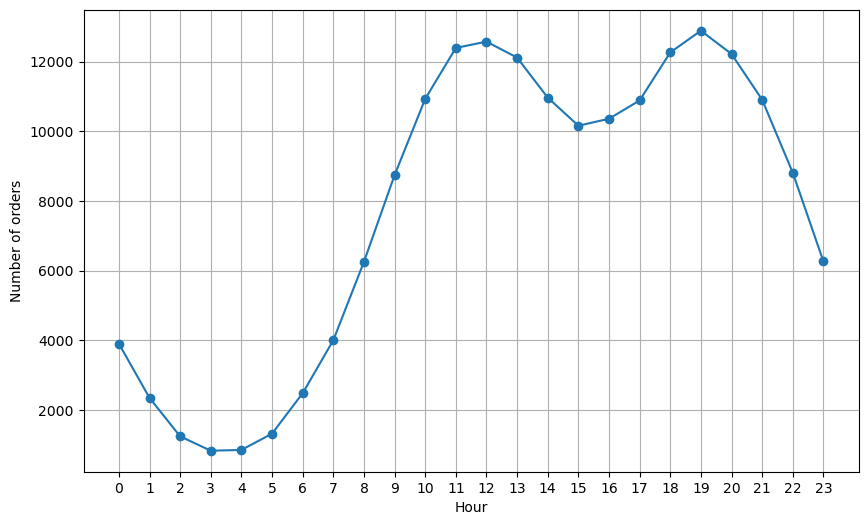

In [225]:
plt.figure(figsize=(10,6))
plt.plot(hour_order['hour'],hour_order['no_of_orders'],'o-')
plt.xticks(hour_order['hour'],)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()



##### It is recommended to advertise around 11 AM or 7 PM.

### Q4: What products are most often sold together?

In [233]:
df2 = df[df['Order ID'].duplicated(keep = False)]
df2['product_group'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df2[['Order ID','product_group']].drop_duplicates()
df2.head()

C:\Users\dinil\AppData\Local\Temp\ipykernel_11248\1371539164.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,product_group
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [238]:
#Referenced from stack overflow post of counting unique parts of numbers into a python dicitonary
from itertools import combinations
from collections import Counter

count = Counter()
for row in df2['product_group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

#or
# for key,value in count.most_common(10):
#     print(key," ",value)

('iPhone', 'Lightning Charging Cable')   1002
('Google Phone', 'USB-C Charging Cable')   985
('iPhone', 'Wired Headphones')   447
('Google Phone', 'Wired Headphones')   413
('Vareebadd Phone', 'USB-C Charging Cable')   361
('iPhone', 'Apple Airpods Headphones')   360
('Google Phone', 'Bose SoundSport Headphones')   220
('USB-C Charging Cable', 'Wired Headphones')   159
('Vareebadd Phone', 'Wired Headphones')   143
('Lightning Charging Cable', 'Wired Headphones')   92


##### Lighting Charging Cable with iPhone, Google Phone with USB-C Charging Cable and iphone with Wire Headphones are the most sold combinations.

### Q5: What product sold the most ?

In [239]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas(TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston(MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles(CA),9
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Sep,8.97,Los Angeles(CA),20
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sep,700.00,San Francisco(CA),16
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Sep,700.00,San Francisco(CA),7
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Sep,379.99,San Francisco(CA),17


In [265]:
products_sold = df.groupby('Product')['Order ID'].count().sort_values(ascending = True).reset_index(name = 'count')
products_sold

,Product,count
0,LG Dryer,646
1,LG Washing Machine,666
2,Vareebadd Phone,2065
3,20in Monitor,4098
4,ThinkPad Laptop,4126
5,Macbook Pro Laptop,4721
6,Flatscreen TV,4794
7,Google Phone,5522
8,34in Ultrawide Monitor,6174
9,27in 4K Gaming Monitor,6225


In [ ]:
plt.hist(survey_df.Age,bins = np.arange(10,80,5), color = 'Purple');


In [266]:
px.bar(x =products_sold['count'] ,y = products_sold['Product'], text = products_sold['count']).update_layout(width = 950, height =600, xaxis_title = 'Months Number',yaxis_title = 'Sales in USD($)')

##### Lighting Charging Cable and USB-C Charging Cable are the most solds products 

In [272]:
prices = df.groupby('Product')['Price Each'].mean().reset_index(name = 'price')
prices

,Product,price
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


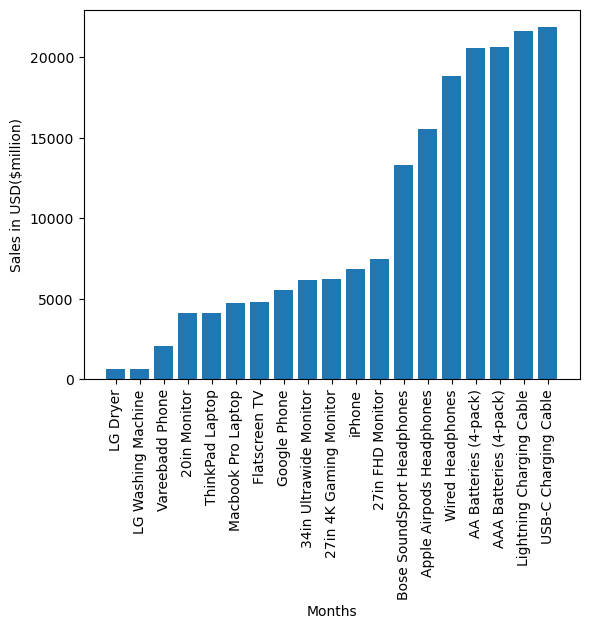

In [299]:
plt.bar(products_sold['Product'],products_sold['count'])
plt.xticks(products_sold['Product'],rotation = 90)

plt.xlabel('Months')
plt.ylabel('Sales in USD($million)')
plt.show()

##### Trying to analyse the most product sold with the prices of the products

C:\Users\dinil\AppData\Local\Temp\ipykernel_11248\870209539.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



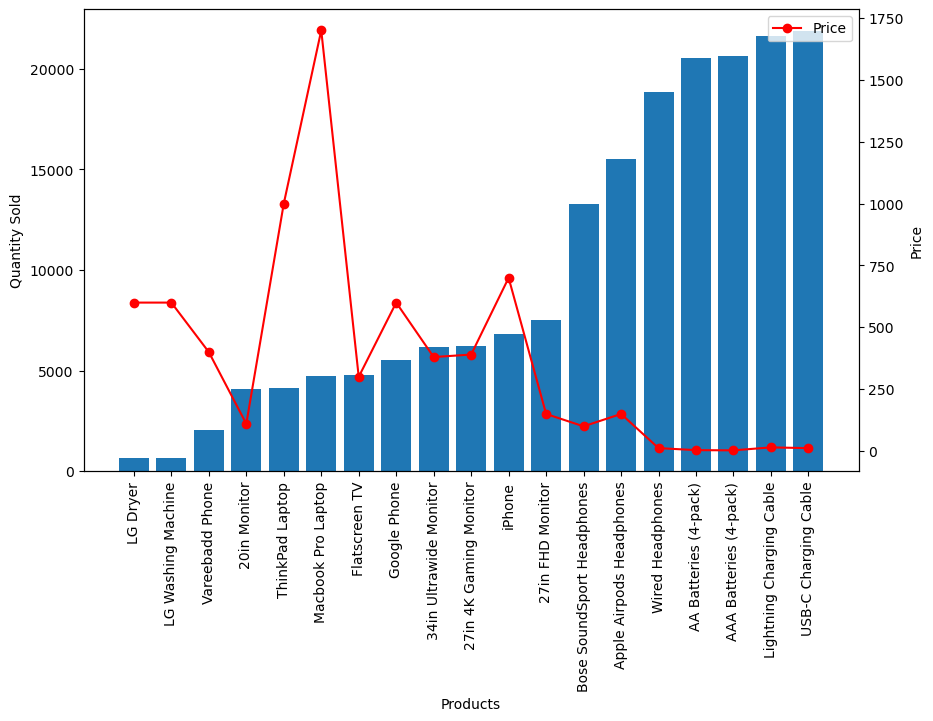

In [312]:
# Merging products_sold and prices on the 'Product' column to align the data
merged_df = pd.merge(products_sold, prices, on='Product', how='inner')

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(merged_df['Product'], merged_df['count'])

# Creating a secondary y-axis (ax2) and ploting the price data there
ax2 = ax1.twinx()
ax2.plot(merged_df['Product'], merged_df['price'], 'o-', color='red')
ax1.set_ylabel('Quantity Sold')
ax2.set_ylabel('Price')
ax1.set_xlabel('Products')
ax2.legend(['Price'], loc='upper right')
ax1.set_xticklabels(merged_df['Product'], rotation='vertical')
plt.show()
